In [17]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError,BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
import logging 
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

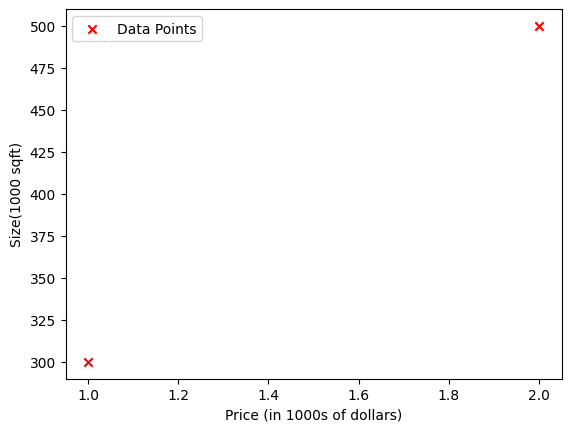

In [4]:
x = np.array([[1.0],[2.0]],dtype=np.float32)
y = np.array([[300.0],[500.0]],dtype=np.float32)
fig,ax = plt.subplots(1,1)
ax.scatter(x,y,marker='x',c='r',label='Data Points')
ax.legend()
ax.set_xlabel('Price (in 1000s of dollars)')
ax.set_ylabel('Size(1000 sqft)')
plt.show()

Defining a neuron and compare it to the linear regression function

In [5]:
linear_layer = tf.keras.layers.Dense(units=1,activation='linear',)

Checking weights 

In [6]:
linear_layer.get_weights()

[]

In [7]:
a1 = linear_layer(x[0].reshape(-1,1)) #Note:Inputs should be a 2D array
print(a1)

tf.Tensor([[0.8156389]], shape=(1, 1), dtype=float32)


In [8]:
w,b = linear_layer.get_weights()
print(f"w = {w} and  b  = {b}")

w = [[0.8156389]] and  b  = [0.]


In [11]:
w_in,b_in = np.array([[200]]), np.array([100])
linear_layer.set_weights([w_in,b_in])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [12]:
a1 = linear_layer(x[0].reshape(-1,1))
print(a1)

alin = np.dot(w_in,x[0].reshape(-1,1) + b_in)
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[20200.]]


In [30]:
pred_tf = linear_layer(x)
pred_np = np.dot(w_in,x[0].reshape(-1,1)) + b_in

In [27]:
def plt_linear(X_train, Y_train, prediction_tf, prediction_np):
    fig, ax = plt.subplots(1,2, figsize=(16,4))
    ax[0].scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
    ax[0].plot(X_train, prediction_tf,  c='blue', label="model output")
    ax[0].text(1.6,350,r"y=$200 x + 100$", fontsize='xx-large', color='magenta')
    ax[0].legend()
    ax[0].set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
    ax[0].set_xlabel('Size (1000 sqft)', fontsize='xx-large')
    ax[0].set_title("Tensorflow prediction",fontsize='xx-large')

    ax[1].scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
    ax[1].plot(X_train, prediction_np,  c='blue', label="model output")
    ax[1].text(1.6,350,r"y=$200 x + 100$", fontsize='xx-large', color='magenta')
    ax[1].legend()
    ax[1].set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
    ax[1].set_xlabel('Size (1000 sqft)', fontsize='xx-large')
    ax[1].set_title("Numpy prediction",fontsize='xx-large')
    plt.show()

ValueError: x and y must have same first dimension, but have shapes (2, 1) and (1, 1)

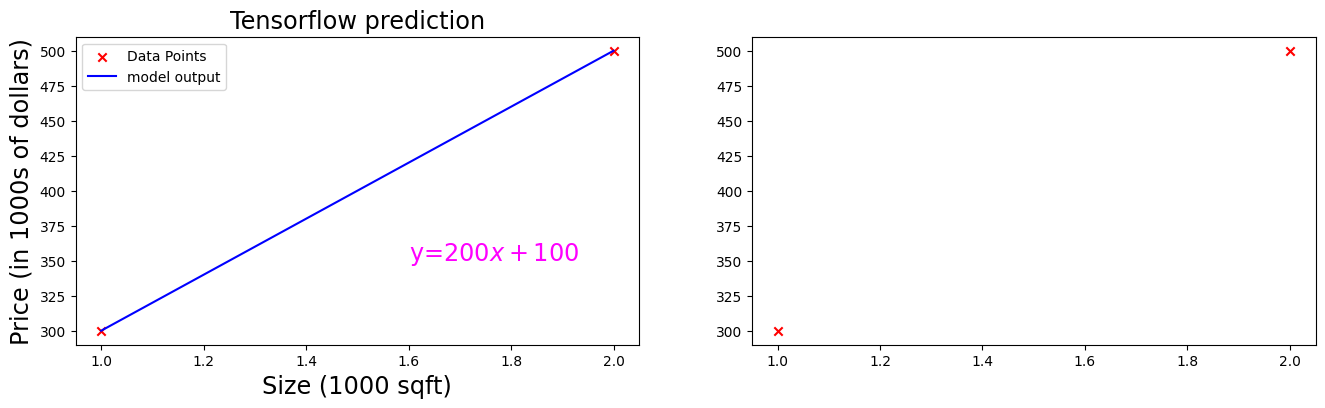

In [28]:
plt_linear(x,y,pred_tf,pred_np)